In [1]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [2]:
connection = create_connection("../database/crypto_billionairs.db")

In [3]:
df = pd.read_sql_query('select * from ETHTUSD_5m_complete_history', connection)

In [4]:
#df = df[:80000]

In [5]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1614556800000,1422.22,1429.47,1415.95,1417.69,8.77880,1614557099999,12490.670977,15,2.91338,4154.603829,0
1,1614557100000,1415.95,1415.95,1413.51,1413.51,12.93203,1614557399999,18293.915342,15,0.00000,0.000000,0
2,1614557400000,1416.68,1418.62,1416.68,1418.62,1.21992,1614557699999,1728.274910,2,0.00000,0.000000,0
3,1614557700000,1425.65,1445.86,1425.65,1443.57,7.37180,1614557999999,10634.033556,9,3.47139,5004.947533,0
4,1614558000000,1441.27,1441.27,1441.27,1441.27,0.01790,1614558299999,25.798733,2,0.00895,12.899366,0


In [6]:
df["return"] = df['close'].pct_change() + 1 

In [7]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


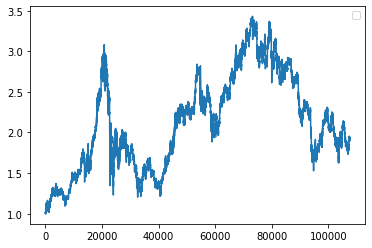

In [8]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [9]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,return
0,1614556800000,1422.22,1429.47,1415.95,1417.69,8.77880,1614557099999,12490.670977,15,2.91338,4154.603829,0,NaN
1,1614557100000,1415.95,1415.95,1413.51,1413.51,12.93203,1614557399999,18293.915342,15,0.00000,0.000000,0,0.997052
2,1614557400000,1416.68,1418.62,1416.68,1418.62,1.21992,1614557699999,1728.274910,2,0.00000,0.000000,0,1.003615
3,1614557700000,1425.65,1445.86,1425.65,1443.57,7.37180,1614557999999,10634.033556,9,3.47139,5004.947533,0,1.017588
4,1614558000000,1441.27,1441.27,1441.27,1441.27,0.01790,1614558299999,25.798733,2,0.00895,12.899366,0,0.998407


In [10]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["open time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]
df_ti["amount"] = df["quote_asset_volume"]

In [11]:
stock = StockDataFrame.retype(df_ti)

In [12]:
df["stochastic_oscillator"] = stock.get("kdjk")
df["relative_strength_index"] = stock.get("rsi_30")

### Different momentum analysis

In [13]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

In [14]:
# 1 Hour Momentum
df["momentum1"] = momentum(df["close"], 12)
# 2 Hour Momentum
df["momentum2"] = momentum(df["close"], 24)
# 4 Hour Momentum
df["momentum4"] = momentum(df["close"], 48)
# 8 Hour Momentum
df["momentum8"] = momentum(df["close"], 96)
# 12 Hour Momentum
df["momentum12"] = momentum(df["close"], 144)
# 1 Day Momentum
df["momentum24"] = momentum(df["close"], 288)
# 2 Day Momentum
df["momentum48"] = momentum(df["close"], 576)
# 4 Day Momentum
df["momentum96"] = momentum(df["close"], 1152)
# 1 Week Momentum
df["momentum168"] = momentum(df["close"], 2016)

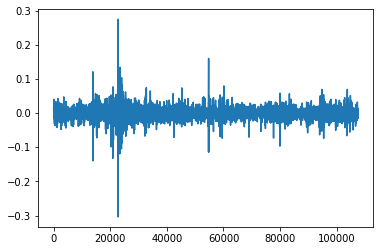

In [15]:
plt.plot(df["momentum1"])
plt.show()

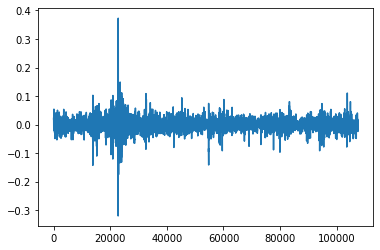

In [16]:
plt.plot(df["momentum2"])
plt.show()

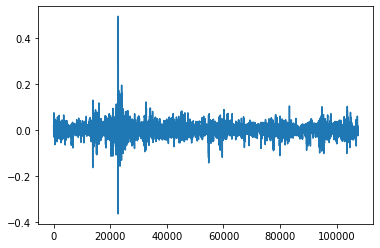

In [17]:
plt.plot(df["momentum4"])
plt.show()

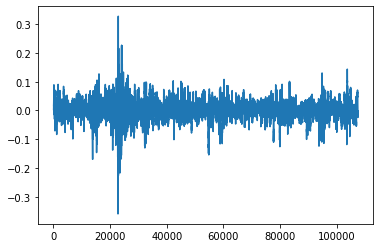

In [18]:
plt.plot(df["momentum8"])
plt.show()

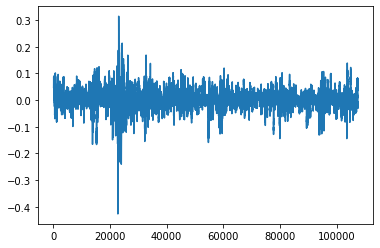

In [19]:
plt.plot(df["momentum12"])
plt.show()

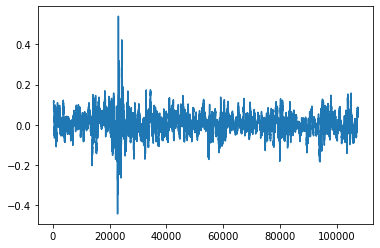

In [20]:
plt.plot(df["momentum24"])
plt.show()

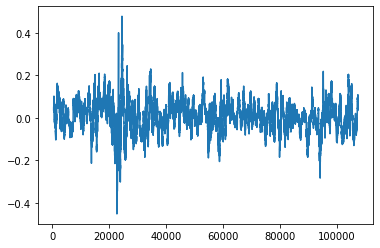

In [21]:
plt.plot(df["momentum48"])
plt.show()

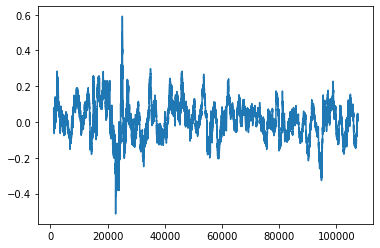

In [22]:
plt.plot(df["momentum96"])
plt.show()

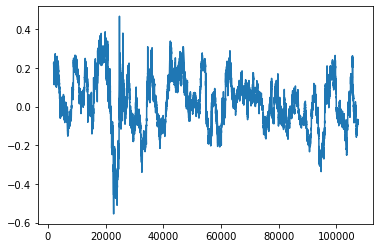

In [23]:
plt.plot(df["momentum168"])
plt.show()

In [24]:
def normalizer(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

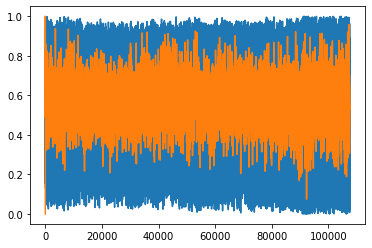

In [25]:
rsi_normalized = normalizer(df["relative_strength_index"])
so_normalized = normalizer(df["stochastic_oscillator"])
momentum168_normalized = normalizer(df["momentum168"])
plt.plot(so_normalized)
plt.plot(rsi_normalized)
plt.show()

### Stochastic Oscialltor and Relative Strength Index as baseline

#### Generating Buying Signals

In [26]:
df["so_group"] = df["stochastic_oscillator"].astype(str).str[0]
df["rsi_group"] = df["relative_strength_index"].astype(str).str[0]

In [27]:
pd.crosstab(df["so_group"], df["rsi_group"])

rsi_group,0,1,2,3,4,5,6,7,8,n
so_group,,,,,,,,,,
0,0,5,26,59,91,65,11,0,0,0
1,0,16,430,2705,5613,1782,87,2,0,0
2,1,3,169,2260,6719,3516,208,2,0,0
3,0,2,74,1494,6081,4419,454,4,0,1
4,0,4,50,876,5176,4868,673,10,1,0
5,0,2,55,702,4631,5558,936,32,0,0
6,0,3,34,489,4380,6752,1427,73,1,0
7,0,3,37,394,3867,7634,2459,166,3,0
8,0,2,57,276,2635,7089,3315,497,14,0


In [28]:
df["technical_indicators"] = df["so_group"] + "/" + df["rsi_group"]

In [29]:
df_momentum2 = pd.DataFrame()
df_momentum2["technical_indicators"] = df["technical_indicators"].shift(24)
df_momentum2["momentum2"] = df["momentum2"]
df_momentum2.groupby("technical_indicators").mean()

,momentum2
technical_indicators,
0/1,-0.000098
0/2,0.003579
0/3,0.002142
0/4,0.000145
0/5,0.001258
...,...
9/4,-0.000557
9/5,-0.000981
9/6,0.000644


In [30]:
df_momentum4 = pd.DataFrame()
df_momentum4["technical_indicators"] = df["technical_indicators"].shift(48)
df_momentum4["momentum4"] = df["momentum4"]
df_momentum4.groupby("technical_indicators").mean()

,momentum4
technical_indicators,
0/1,0.002172
0/2,0.000407
0/3,-0.001943
0/4,0.001716
0/5,0.000267
...,...
9/4,0.000584
9/5,-0.000623
9/6,0.000578


In [31]:
df_momentum8 = pd.DataFrame()
df_momentum8["technical_indicators"] = df["technical_indicators"].shift(96)
df_momentum8["momentum8"] = df["momentum8"]
df_momentum8.groupby("technical_indicators").median()

,momentum8
technical_indicators,
0/1,0.004088
0/2,-0.005782
0/3,0.000695
0/4,0.006999
0/5,0.001428
...,...
9/4,0.001261
9/5,-0.001006
9/6,-0.001105


In [32]:
df_momentum12 = pd.DataFrame()
df_momentum12["technical_indicators"] = df["technical_indicators"].shift(144)
df_momentum12["momentum12"] = df["momentum12"]
df_momentum12.groupby("technical_indicators").median()

,momentum12
technical_indicators,
0/1,0.010337
0/2,-0.017114
0/3,-0.008460
0/4,0.008039
0/5,-0.002442
...,...
9/4,0.001403
9/5,0.000258
9/6,0.001056


In [33]:
df_momentum24 = pd.DataFrame()
df_momentum24["technical_indicators"] = df["technical_indicators"].shift(288)
df_momentum24["momentum24"] = df["momentum24"]
df_momentum24.groupby("technical_indicators").median()

,momentum24
technical_indicators,
0/1,-0.000124
0/2,-0.022665
0/3,0.002182
0/4,-0.003456
0/5,-0.013980
...,...
9/4,0.000640
9/5,0.000204
9/6,0.000164


In [34]:
df_momentum48 = pd.DataFrame()
df_momentum48["technical_indicators"] = df["technical_indicators"].shift(576)
df_momentum48["momentum48"] = df["momentum48"]
df_momentum48.groupby("technical_indicators").median()

,momentum48
technical_indicators,
0/1,-0.030806
0/2,-0.018324
0/3,-0.018827
0/4,0.016534
0/5,-0.053414
...,...
9/4,0.001502
9/5,0.005659
9/6,0.004915


In [35]:
df_momentum96 = pd.DataFrame()
df_momentum96["technical_indicators"] = df["technical_indicators"].shift(1152)
df_momentum96["momentum96"] = df["momentum96"]
df_momentum96.groupby("technical_indicators").median()

,momentum96
technical_indicators,
0/1,-0.059346
0/2,-0.192252
0/3,-0.063996
0/4,0.025809
0/5,-0.059091
...,...
9/4,0.002777
9/5,0.017196
9/6,0.005342


In [36]:
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").median())

,momentum168
technical_indicators,
0/1,-0.272036
0/2,-0.241549
0/3,-0.155356
0/4,-0.057104
0/5,-0.233700
0/6,-0.270379
1/1,0.006878
1/2,0.001926
1/3,0.013664


#### Generating selling Signals

In [243]:
df_momentum96 = pd.DataFrame()
df_momentum96["technical_indicators"] = df["technical_indicators"].shift(1152)
df_momentum96["momentum96"] = df["momentum96"]
df_momentum96.groupby("technical_indicators").median()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").median())

,momentum12
technical_indicators,
0/1,0.010337
0/2,-0.017114
0/3,-0.008460
0/4,0.008039
0/5,-0.002442
0/6,0.014897
1/1,0.004028
1/2,0.003642
1/3,0.002613


In [83]:
df_momentum168 = pd.DataFrame()
df_momentum168["rsi_group"] = df["rsi_group"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
df_momentum168.groupby("rsi_group").mean()

,momentum168
rsi_group,
0,0.226804
1,-0.035697
2,-0.002103
3,0.010837
4,0.020667
5,0.018725
6,0.023798
7,0.023865
8,0.005190


### RSI Only Analysis

In [38]:
df_momentum2 = pd.DataFrame()
df_momentum2["rsi_group"] = df["rsi_group"].shift(24)
df_momentum2["momentum2"] = df["momentum2"]
df_momentum2.groupby("rsi_group").mean()

,momentum2
rsi_group,
0,0.024443
1,0.007841
2,0.001231
3,0.000563
4,0.000329
5,-0.000005
6,0.000424
7,0.002895
8,-0.001293


In [39]:
df_momentum4 = pd.DataFrame()
df_momentum4["rsi_group"] = df["rsi_group"].shift(48)
df_momentum4["momentum4"] = df["momentum4"]
df_momentum4.groupby("rsi_group").mean()

,momentum4
rsi_group,
0,0.020962
1,0.012120
2,0.003481
3,0.000970
4,0.000434
5,0.000274
6,0.000781
7,0.003003
8,-0.001721


In [40]:
df_momentum8 = pd.DataFrame()
df_momentum8["rsi_group"] = df["rsi_group"].shift(96)
df_momentum8["momentum8"] = df["momentum8"]
df_momentum8.groupby("rsi_group").mean()

,momentum8
rsi_group,
0,0.018309
1,0.011731
2,0.004004
3,0.000666
4,0.000971
5,0.001083
6,0.000618
7,0.003284
8,-0.001692


In [41]:
df_momentum12 = pd.DataFrame()
df_momentum12["rsi_group"] = df["rsi_group"].shift(144)
df_momentum12["momentum12"] = df["momentum12"]
df_momentum12.groupby("rsi_group").mean()

,momentum12
rsi_group,
0,0.079922
1,0.004379
2,0.004708
3,0.001497
4,0.001632
5,0.001383
6,0.001004
7,0.002968
8,0.007938


In [42]:
df_momentum24 = pd.DataFrame()
df_momentum24["rsi_group"] = df["rsi_group"].shift(288)
df_momentum24["momentum24"] = df["momentum24"]
df_momentum24.groupby("rsi_group").mean()

,momentum24
rsi_group,
0,0.119893
1,0.016563
2,0.001319
3,0.002481
4,0.004098
5,0.002265
6,0.001358
7,0.004666
8,0.016250


In [43]:
df_momentum48 = pd.DataFrame()
df_momentum48["rsi_group"] = df["rsi_group"].shift(576)
df_momentum48["momentum48"] = df["momentum48"]
df_momentum48.groupby("rsi_group").mean()

,momentum48
rsi_group,
0,0.046600
1,0.003888
2,0.005286
3,0.006305
4,0.006400
5,0.004290
6,0.005797
7,0.005287
8,0.021962


In [244]:
df_momentum96 = pd.DataFrame()
df_momentum96["rsi_group"] = df["rsi_group"].shift(1152)
df_momentum96["momentum96"] = df["momentum96"]
df_momentum96.groupby("rsi_group").mean()

,momentum96
rsi_group,
0,0.068553
1,-0.009765
2,-0.005184
3,0.004444
4,0.012324
5,0.010477
6,0.011099
7,0.012971
8,0.008207


In [44]:
df_momentum168 = pd.DataFrame()
df_momentum168["rsi_group"] = df["rsi_group"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
df_momentum168.groupby("rsi_group").mean()

,momentum168
rsi_group,
0,0.226804
1,-0.035697
2,-0.002103
3,0.010837
4,0.020667
5,0.018725
6,0.023798
7,0.023865
8,0.005190


### Backtesting (Long-Only) - Calculate the returns by applying basic rules

In [187]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
df.loc[df["technical_indicators"] == "7/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "8/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "9/7", 'buy_indicator'] = 1

In [188]:
df["sell_indicator"] = 0
df.loc[df["technical_indicators"].shift(2016) == "7/7", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "8/7", 'sell_indicator'] = 1
df.loc[df["technical_indicators"].shift(2016) == "9/7", 'sell_indicator'] = 1


In [189]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [190]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

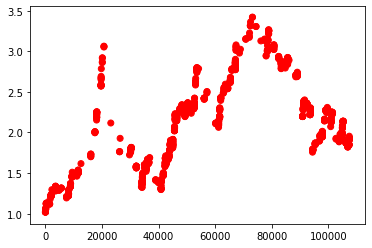

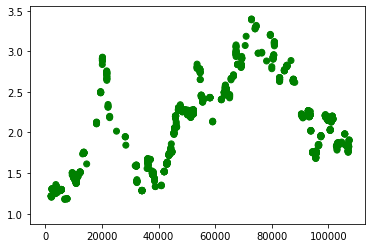

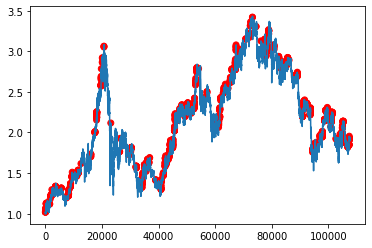

In [191]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [260]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []
    sell_index = 0

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0 and index > sell_index:
            assets = money / row["close"]
            money = 0
            buy_index = index
            sell_index = buy_index + 2015

        if sell_index == index and money == 0: 
            money = assets * df["close"][sell_index]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [261]:
print(max(hist))

4.140815102295451


In [262]:
print(result)

1.6219872418710528


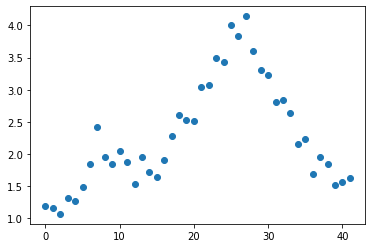

In [263]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [204]:
#sharp ratio, sortino ratio, maximum drawdown, carl mar ratio 

#last value predictor

#### Backtesting (Long-Short) - Calculate the return applying basic rules

In [264]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
df.loc[df["technical_indicators"] == "7/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "8/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "9/7", 'buy_indicator'] = 1

In [308]:
df["sell_indicator"] = 0
sell_indicators = ["5/1", "6/1", "7/1", "0/2", "0/3", "9/8", "0/3"]
                   
for sell_indicator in sell_indicators:
    df.loc[df["technical_indicators"].shift(288) == sell_indicator, 'sell_indicator'] = 1

In [309]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [310]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

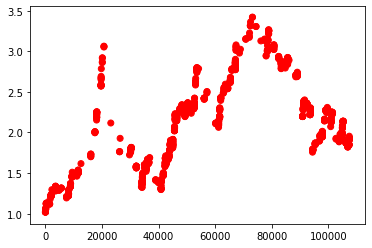

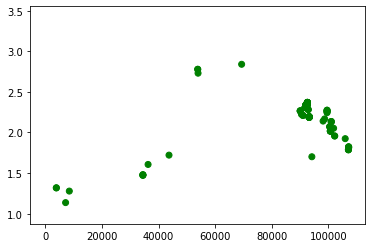

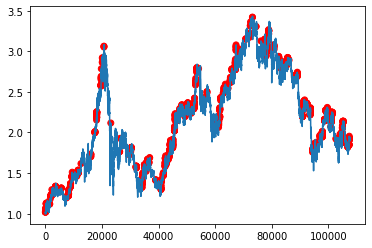

In [311]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [312]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0:
            assets = money / row["close"]
            money = 0
            

        if row["sell_indicator"] == 1 and money == 0: 
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [313]:
print(max(hist))

2.3514986631142727


In [314]:
print(result)

1.4391324897677693


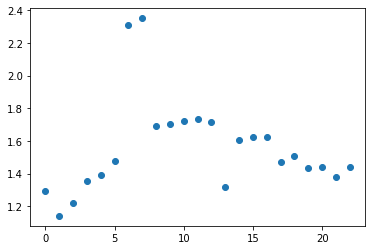

In [315]:
plt.scatter(list(range(len(hist))), hist)
plt.show()